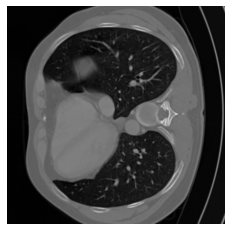

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import animation, rc
from matplotlib.animation import PillowWriter
rc('animation', html='html5')


def grayToColored (VolumePath,MaskPath,alpha=0.2):
    def normalize(arr):
        return (255*(arr - np.min(arr)) / (np.max(arr) - np.min(arr)))

    Volume = nib.load(VolumePath).get_fdata()
    Mask = nib.load(MaskPath).get_fdata()
    Masklabel=[]
    masksNo=np.unique(Mask)[1:]
    dest=np.stack((normalize(Volume).astype(np.uint8),)*3,axis=-1)

    if masksNo.shape[0]<7:
        numbers=[0,1]
    else:
        numbers=[0,0.5,1]
    colors=[]
    for i in numbers:
        for j in numbers:
            for k in numbers:
                if(i==j==k):
                    continue
                colors.append([i,j,k])
                
    colors= np.asarray((colors))
    for i,label in enumerate(masksNo):
        Masklabel.append(Mask==label)
        Masklabel[i]=np.stack((Masklabel[i],)*3,axis=-1)
        Masklabel[i]=np.multiply((Masklabel[i].astype(np.uint8)*255),colors[i]).astype(np.uint8)
        dest = cv.addWeighted(dest, 1, Masklabel[i],alpha, 0.0)
    return dest



def animate(volume,outputName):
    fig = plt.figure()
    ims = []
    for i in range(volume.shape[2]):
        plt.axis('off')
        im = plt.imshow(volume[:,:,i],animated=True);
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                    repeat_delay=100)
    ani.save(outputName, dpi=300, writer=PillowWriter(fps=5))



volume=grayToColored('C:/dataset/Path/liver-orig002.nii','C:/dataset/Path2/liver-seg002.nii')
animate(volume,'Vol_Mask_Overlay.gif')

In [3]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

In [3]:
#     if LOAD_MODEL:
#         load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)